Saved regional average plot: Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\model_metric_plots_RMSE\average_R2_AP.png


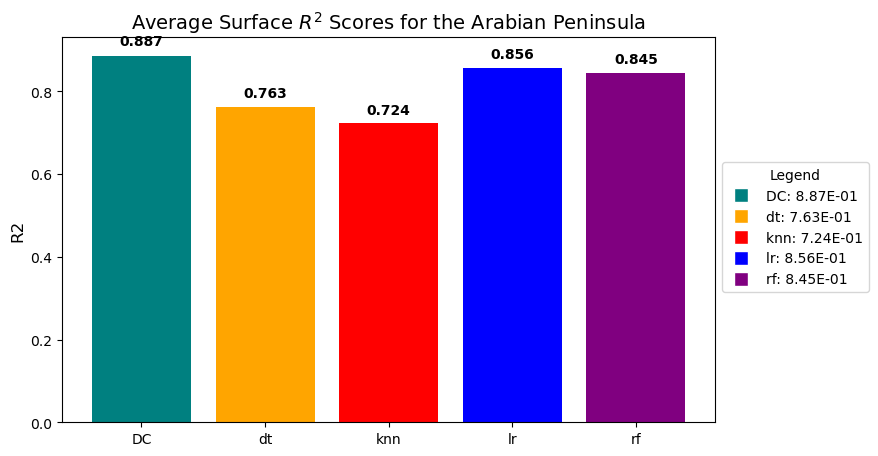

Saved regional average plot: Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\model_metric_plots_RMSE\average_MSE_AP.png


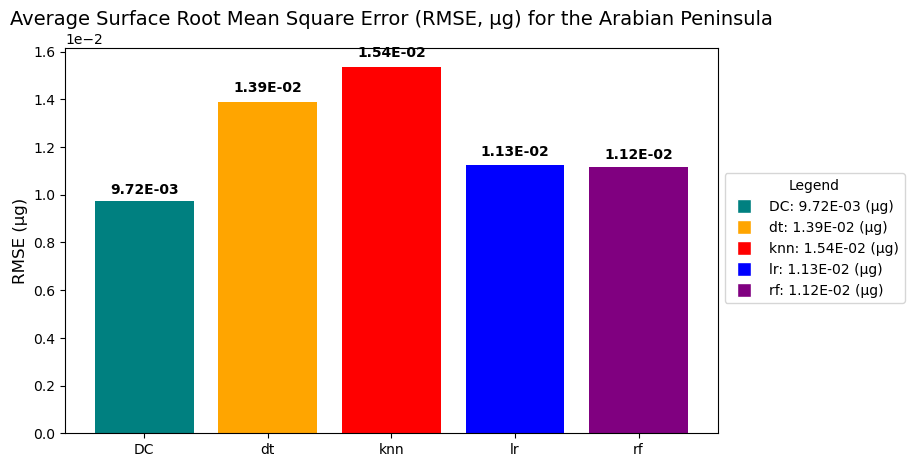

Saved regional average plot: Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\model_metric_plots_RMSE\average_MAE_AP.png


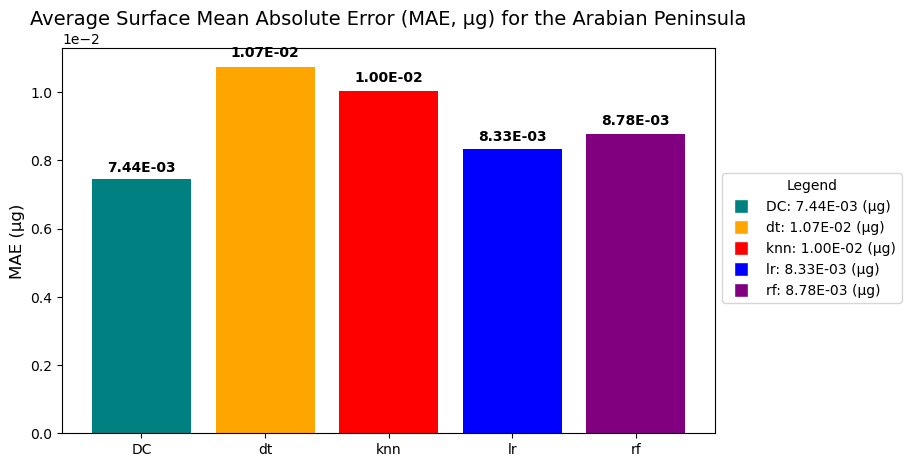

Saved regional average plot: Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\model_metric_plots_RMSE\average_Weight_AP.png


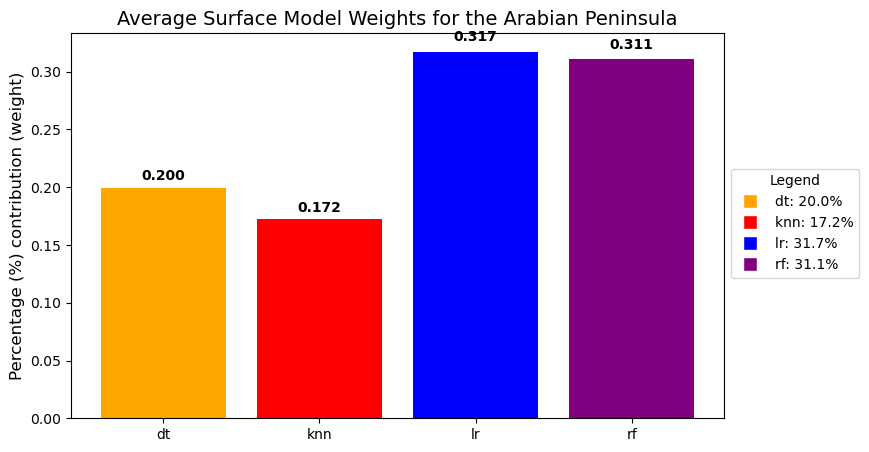

In [2]:
#SFC-lowercase labels
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\sfc_model_metrics_2023_v0063.csv"
data = pd.read_csv(file_path)

# Rename ensemble model to 'DustCast' (DC)
data['Model'] = data['Model'].replace({'ensemble': 'DC'})

# Define color and marker scheme
model_styles = {
    'DC': ('teal', 's'),  # DustCast
    'lr': ('blue', 's'),  # Linear Regression
    # 'svr': ('green', 's'),  # Support Vector Regression 
    'knn': ('red', 's'),  # K-Nearest Neighbors
    'dt': ('orange', 's'),  # Decision Tree
    'rf': ('purple', 's')  # Random Forest
}

# Metrics to plot
metrics = ['Weight', 'R2', 'MSE', 'MAE']
titles = {
    'Weight': "Model Weights",
    'R2': "$R^2$ Scores",
    'MSE': "Mean Square Error (MSE)",
    'MAE': "Mean Absolute Error (MAE)"
}

# Define output directory for plots
output_dir = r"Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\model_metric_plots_RMSE"
os.makedirs(output_dir, exist_ok=True)  # Ensure directory exists

def add_value_labels(ax, bars, is_sci_notation=False):
    """Adds value labels on top of each bar."""
    for bar in bars:
        height = bar.get_height()
        if is_sci_notation:
            label = f"{height:.2E}"  # Scientific notation
        else:
            label = f"{height:.3f}"
        ax.text(bar.get_x() + bar.get_width() / 2, height * 1.02, label,
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Compute and plot the average MSE, MAE, R², and Weight across all countries
for metric in ['R2', 'MSE', 'MAE', 'Weight']:
    average_metrics = data.groupby('Model')[metric].mean().reset_index()
    
    # Convert the values:
    # For MSE, take the square root (i.e., RMSE) then convert to micrograms (μg)
    if metric == 'MSE':
        average_metrics[metric] = average_metrics[metric].apply(lambda x: x**0.5) * 1e6
    # For MAE, simply convert to micrograms (μg)
    elif metric == 'MAE':
        average_metrics[metric] = average_metrics[metric] * 1e6

    # For the Weight metric, exclude DC and update the y-axis label and legend formatting
    if metric == "Weight":
        average_metrics = average_metrics[average_metrics['Model'] != 'DC']
    
    # Create a new figure for the regional average with space for the right legend
    fig, ax = plt.subplots(figsize=(9, 5))
    colors = [model_styles.get(model, ('gray', 'o'))[0] for model in average_metrics['Model']]
    
    bars = ax.bar(average_metrics['Model'], average_metrics[metric], color=colors)
    
    # Update title and y-axis label according to the metric and desired units
    if metric == 'MSE':
        ax.set_title("Average Surface Root Mean Square Error (RMSE, μg) for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel("RMSE (μg)", fontsize=12)
    elif metric == 'MAE':
        ax.set_title("Average Surface Mean Absolute Error (MAE, μg) for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel("MAE (μg)", fontsize=12)
    elif metric == "Weight":
        ax.set_title(f"Average Surface {titles[metric]} for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel("Percentage (%) contribution (weight)", fontsize=12)
    else:
        ax.set_title(f"Average Surface {titles[metric]} for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel(metric, fontsize=12)

    # Apply scientific notation to y-axis for small values for MSE and MAE
    if metric in ['MSE', 'MAE']:
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        add_value_labels(ax, bars, is_sci_notation=True)
    else:
        add_value_labels(ax, bars, is_sci_notation=False)

    # Create legends:
    filtered_models = average_metrics['Model'].unique()

    # Legend 1: Model Colors (inside graph, upper right)
    handles_colors = [plt.Line2D([0], [0], marker=model_styles[m][1], color='w', 
                                 markerfacecolor=model_styles[m][0], markersize=10) 
                      for m in filtered_models if m in model_styles]

    # Legend 2: Metric Values (right next to the graph) with units for MSE and MAE
    if metric == "Weight":
        labels_values = [f"{m}: {average_metrics[average_metrics['Model'] == m][metric].values[0]*100:.1f}%" 
                         for m in filtered_models if m in model_styles]
    elif metric in ["MSE", "MAE"]:
        labels_values = [f"{m}: {average_metrics[average_metrics['Model'] == m][metric].values[0]:.2E} (μg)"
                         for m in filtered_models if m in model_styles]
    else:
        labels_values = [f"{m}: {average_metrics[average_metrics['Model'] == m][metric].values[0]:.2E}"
                         for m in filtered_models if m in model_styles]
    
    fig.subplots_adjust(right=0.85)  # Adjust spacing for the second legend
    plt.figlegend(handles_colors, labels_values, loc='center left', title="Legend", bbox_to_anchor=(0.85, 0.5))

    # Save the figure
    save_path = os.path.join(output_dir, f"average_{metric}_AP.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Saved regional average plot: {save_path}")

    # Show the plot
    plt.show()


C:\Users\Charl\AppData\Local\Temp\ipykernel_28364\2389002919.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([model_mapping.get(item, item.upper()) for item in average_metrics['Model']])


Saved regional average plot: Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\model_metric_plots_RMSE\average_R2_AP.png


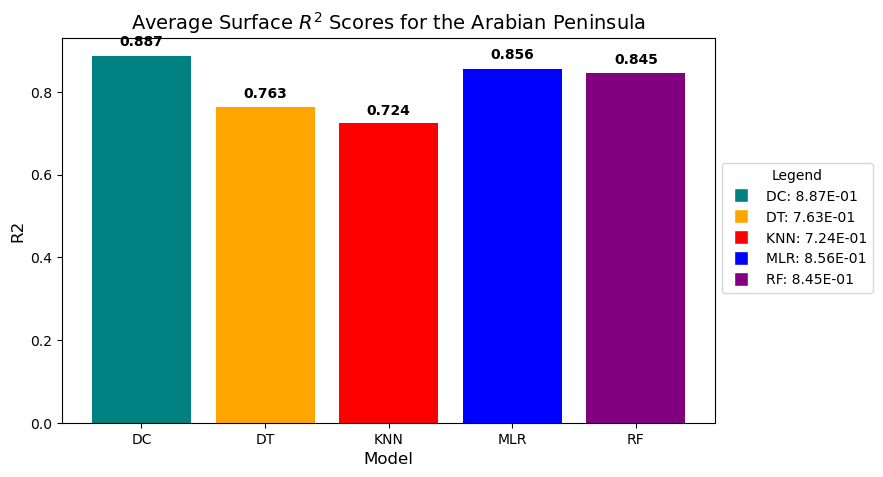

C:\Users\Charl\AppData\Local\Temp\ipykernel_28364\2389002919.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([model_mapping.get(item, item.upper()) for item in average_metrics['Model']])


Saved regional average plot: Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\model_metric_plots_RMSE\average_MSE_AP.png


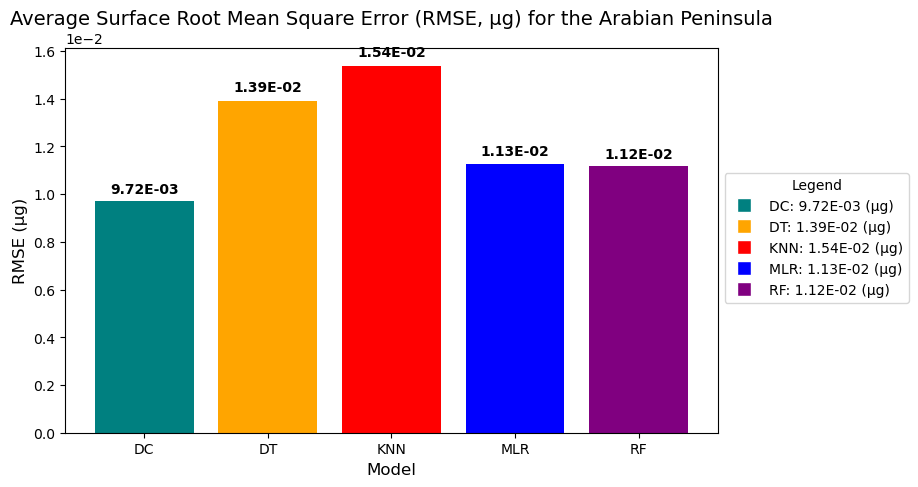

C:\Users\Charl\AppData\Local\Temp\ipykernel_28364\2389002919.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([model_mapping.get(item, item.upper()) for item in average_metrics['Model']])


Saved regional average plot: Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\model_metric_plots_RMSE\average_MAE_AP.png


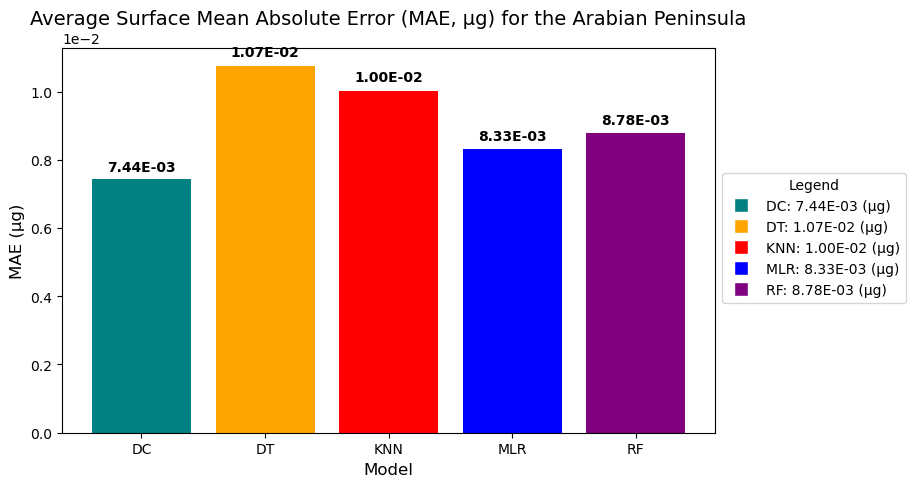

C:\Users\Charl\AppData\Local\Temp\ipykernel_28364\2389002919.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([model_mapping.get(item, item.upper()) for item in average_metrics['Model']])


Saved regional average plot: Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\model_metric_plots_RMSE\average_Weight_AP.png


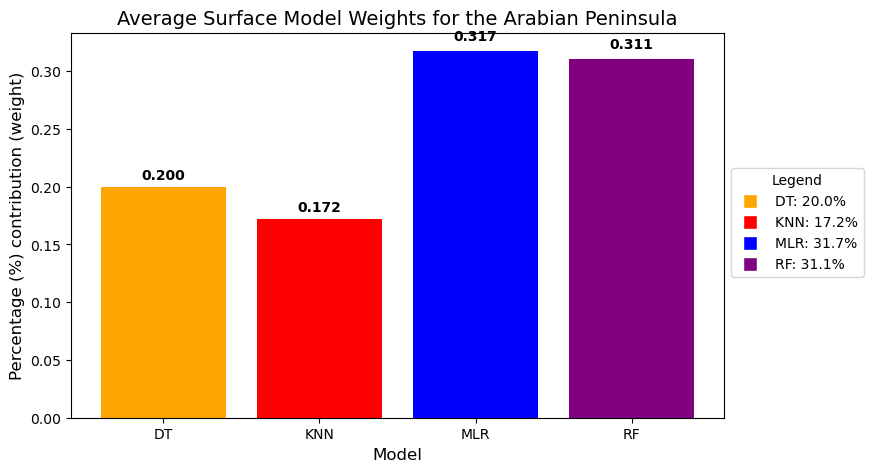

In [5]:
#SFC-UPPERCASE Labels
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\sfc_model_metrics_2023_v0063.csv"
data = pd.read_csv(file_path)

# Rename ensemble model to 'DustCast' (DC)
data['Model'] = data['Model'].replace({'ensemble': 'DC'})

# Define color and marker scheme (keys remain lower-case)
model_styles = {
    'DC': ('teal', 's'),  # DustCast
    'lr': ('blue', 's'),  # Linear Regression
    # 'svr': ('green', 's'),  # Support Vector Regression 
    'knn': ('red', 's'),  # K-Nearest Neighbors
    'dt': ('orange', 's'),  # Decision Tree
    'rf': ('purple', 's')  # Random Forest
}

# Define the mapping from lower-case keys to desired uppercase display labels
model_mapping = {
    'DC': 'DC',
    'lr': 'MLR',
    'knn': 'KNN',
    'dt': 'DT',
    'rf': 'RF'
}

# Metrics to plot
metrics = ['Weight', 'R2', 'MSE', 'MAE']
titles = {
    'Weight': "Model Weights",
    'R2': "$R^2$ Scores",
    'MSE': "Mean Square Error (MSE)",
    'MAE': "Mean Absolute Error (MAE)"
}

# Define output directory for plots
output_dir = r"Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\model_metric_plots_RMSE"
os.makedirs(output_dir, exist_ok=True)  # Ensure directory exists

def add_value_labels(ax, bars, is_sci_notation=False):
    """Adds value labels on top of each bar."""
    for bar in bars:
        height = bar.get_height()
        if is_sci_notation:
            label = f"{height:.2E}"  # Scientific notation
        else:
            label = f"{height:.3f}"
        ax.text(bar.get_x() + bar.get_width() / 2, height * 1.02, label,
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Compute and plot the average MSE, MAE, R², and Weight across all countries
for metric in ['R2', 'MSE', 'MAE', 'Weight']:
    average_metrics = data.groupby('Model')[metric].mean().reset_index()
    
    # Convert the values:
    # For MSE, take the square root (i.e., RMSE) then convert to micrograms (μg)
    if metric == 'MSE':
        average_metrics[metric] = average_metrics[metric].apply(lambda x: x**0.5) * 1e6
    # For MAE, simply convert to micrograms (μg)
    elif metric == 'MAE':
        average_metrics[metric] = average_metrics[metric] * 1e6

    # For the Weight metric, exclude DC and update the y-axis label and legend formatting
    if metric == "Weight":
        average_metrics = average_metrics[average_metrics['Model'] != 'DC']
    
    # Create a new figure for the regional average with space for the right legend
    fig, ax = plt.subplots(figsize=(9, 5))
    # Use the original model key for color lookup
    colors = [model_styles.get(model, ('gray', 'o'))[0] for model in average_metrics['Model']]
    
    bars = ax.bar(average_metrics['Model'], average_metrics[metric], color=colors)
    ax.set_xlabel("Model", fontsize=12)
    
    # Update the x-axis tick labels using the mapping dictionary
    ax.set_xticklabels([model_mapping.get(item, item.upper()) for item in average_metrics['Model']])
    
    # Update title and y-axis label according to the metric and desired units
    if metric == 'MSE':
        ax.set_title("Average Surface Root Mean Square Error (RMSE, μg) for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel("RMSE (μg)", fontsize=12)
    elif metric == 'MAE':
        ax.set_title("Average Surface Mean Absolute Error (MAE, μg) for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel("MAE (μg)", fontsize=12)
    elif metric == "Weight":
        ax.set_title(f"Average Surface {titles[metric]} for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel("Percentage (%) contribution (weight)", fontsize=12)
    else:
        ax.set_title(f"Average Surface {titles[metric]} for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel(metric, fontsize=12)

    # Apply scientific notation to y-axis for small values for MSE and MAE
    if metric in ['MSE', 'MAE']:
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        add_value_labels(ax, bars, is_sci_notation=True)
    else:
        add_value_labels(ax, bars, is_sci_notation=False)

    # Create legends:
    # Use the original model keys for legend construction, then map them to display labels.
    filtered_models = average_metrics['Model'].unique()

    # Legend 1: Model Colors (inside graph, upper right)
    handles_colors = [plt.Line2D([0], [0], marker=model_styles[m][1], color='w', 
                                 markerfacecolor=model_styles[m][0], markersize=10) 
                      for m in filtered_models if m in model_styles]

    # Legend 2: Metric Values (right next to the graph) with units for MSE and MAE
    if metric == "Weight":
        labels_values = [f"{model_mapping.get(m, m.upper())}: {average_metrics[average_metrics['Model'] == m][metric].values[0]*100:.1f}%" 
                         for m in filtered_models if m in model_styles]
    elif metric in ["MSE", "MAE"]:
        labels_values = [f"{model_mapping.get(m, m.upper())}: {average_metrics[average_metrics['Model'] == m][metric].values[0]:.2E} (μg)"
                         for m in filtered_models if m in model_styles]
    else:
        labels_values = [f"{model_mapping.get(m, m.upper())}: {average_metrics[average_metrics['Model'] == m][metric].values[0]:.2E}"
                         for m in filtered_models if m in model_styles]
    
    fig.subplots_adjust(right=0.85)  # Adjust spacing for the second legend
    plt.figlegend(handles_colors, labels_values, loc='center left', title="Legend", bbox_to_anchor=(0.85, 0.5))

    # Save the figure
    save_path = os.path.join(output_dir, f"average_{metric}_AP.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Saved regional average plot: {save_path}")

    # Show the plot
    plt.show()


Saved regional average plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_metric_plots_RMSE\average_R2_AP.png


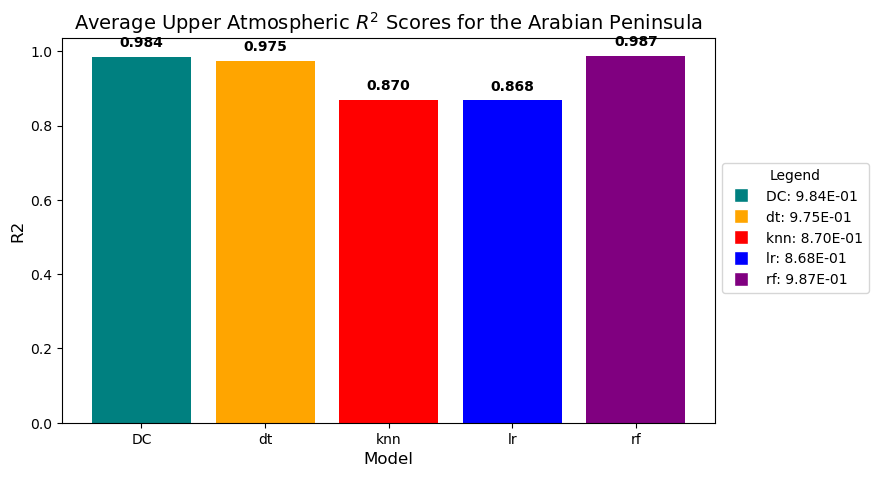

Saved regional average plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_metric_plots_RMSE\average_MSE_AP.png


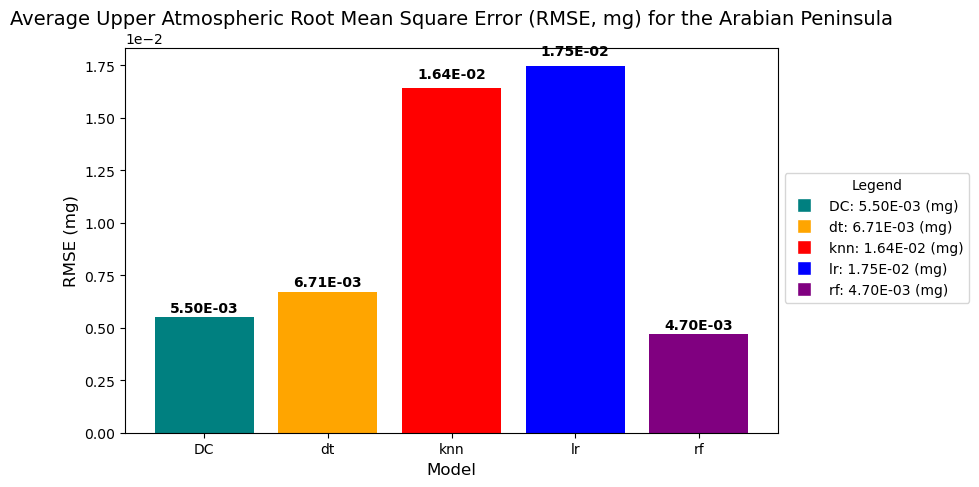

Saved regional average plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_metric_plots_RMSE\average_MAE_AP.png


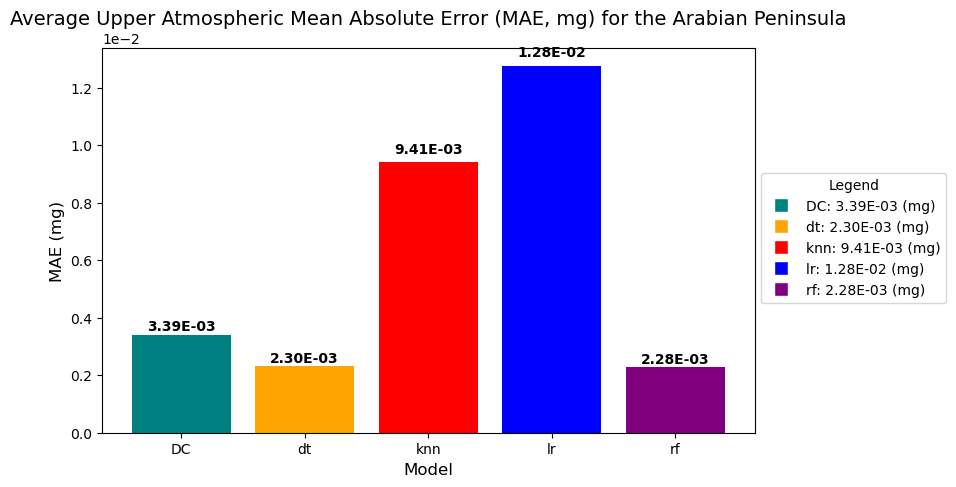

Saved regional average plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_metric_plots_RMSE\average_Weight_AP.png


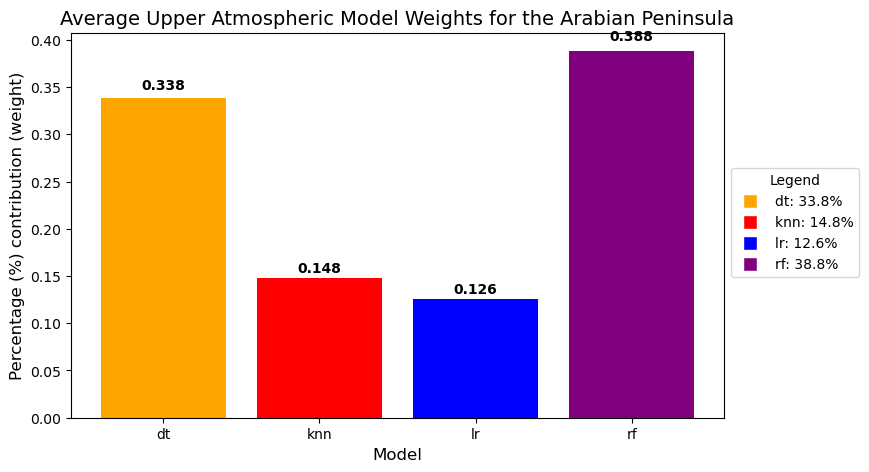

In [6]:
# UA-lowercase labels
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\ua_model_metrics_2023_v0063.csv"
data = pd.read_csv(file_path)

# Rename ensemble model to 'DustCast' (DC)
data['Model'] = data['Model'].replace({'ensemble': 'DC'})

# Define color and marker scheme
model_styles = {
    'DC': ('teal', 's'),  # DustCast
    'lr': ('blue', 's'),  # Linear Regression
    # 'svr': ('green', 's'),  # Support Vector Regression
    'knn': ('red', 's'),  # K-Nearest Neighbors
    'dt': ('orange', 's'),  # Decision Tree
    'rf': ('purple', 's')  # Random Forest
}

# Metrics to plot
metrics = ['Weight', 'R2', 'MSE', 'MAE']
titles = {
    'Weight': "Model Weights",
    'R2': "$R^2$ Scores",
    'MSE': "Mean Square Error (MSE)",
    'MAE': "Mean Absolute Error (MAE)"
}

# Define output directory for plots
output_dir = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_metric_plots_RMSE"
os.makedirs(output_dir, exist_ok=True)  # Ensure directory exists

def add_value_labels(ax, bars, is_sci_notation=False):
    """Adds value labels on top of each bar."""
    for bar in bars:
        height = bar.get_height()
        if is_sci_notation:
            label = f"{height:.2E}"  # Scientific notation
        else:
            label = f"{height:.3f}"
        ax.text(bar.get_x() + bar.get_width() / 2, height * 1.02, label,
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Compute and plot the average MSE, MAE, R², and Weight across all countries
for metric in ['R2', 'MSE', 'MAE', 'Weight']:
    average_metrics = data.groupby('Model')[metric].mean().reset_index()
    
    # Convert the values:
    # For MSE, take the square root (i.e., RMSE) then convert to milligrams (mg)
    if metric == 'MSE':
        average_metrics[metric] = average_metrics[metric].apply(lambda x: x**0.5) * 1e3
    # For MAE, simply convert to milligrams (mg)
    elif metric == 'MAE':
        average_metrics[metric] = average_metrics[metric] * 1e3

    # For the Weight metric, exclude DC and update the y-axis label and legend formatting
    if metric == "Weight":
        average_metrics = average_metrics[average_metrics['Model'] != 'DC']
    
    # Create a new figure for the regional average with space for the right legend
    fig, ax = plt.subplots(figsize=(9, 5))
    colors = [model_styles.get(model, ('gray', 'o'))[0] for model in average_metrics['Model']]
    
    bars = ax.bar(average_metrics['Model'], average_metrics[metric], color=colors)
    ax.set_xlabel("Model", fontsize=12)
    
    # Update title and y-axis label according to the metric and desired units
    if metric == 'MSE':
        ax.set_title("Average Upper Atmospheric Root Mean Square Error (RMSE, mg) for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel("RMSE (mg)", fontsize=12)
    elif metric == 'MAE':
        ax.set_title("Average Upper Atmospheric Mean Absolute Error (MAE, mg) for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel("MAE (mg)", fontsize=12)
    elif metric == "Weight":
        ax.set_title(f"Average Upper Atmospheric {titles[metric]} for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel("Percentage (%) contribution (weight)", fontsize=12)
    else:
        ax.set_title(f"Average Upper Atmospheric {titles[metric]} for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel(metric, fontsize=12)

    # Apply scientific notation to y-axis for small values for MSE and MAE
    if metric in ['MSE', 'MAE']:
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        add_value_labels(ax, bars, is_sci_notation=True)
    else:
        add_value_labels(ax, bars, is_sci_notation=False)

    # Create legends:
    filtered_models = average_metrics['Model'].unique()

    # Legend 1: Model Colors (inside graph, upper right)
    handles_colors = [plt.Line2D([0], [0], marker=model_styles[m][1], color='w', 
                                 markerfacecolor=model_styles[m][0], markersize=10) 
                      for m in filtered_models if m in model_styles]

    # Legend 2: Metric Values (right next to the graph) with units for MSE and MAE
    if metric == "Weight":
        labels_values = [f"{m}: {average_metrics[average_metrics['Model'] == m][metric].values[0]*100:.1f}%" 
                         for m in filtered_models if m in model_styles]
    elif metric in ["MSE", "MAE"]:
        labels_values = [f"{m}: {average_metrics[average_metrics['Model'] == m][metric].values[0]:.2E} (mg)"
                         for m in filtered_models if m in model_styles]
    else:
        labels_values = [f"{m}: {average_metrics[average_metrics['Model'] == m][metric].values[0]:.2E}"
                         for m in filtered_models if m in model_styles]
    
    fig.subplots_adjust(right=0.85)  # Fine-tune spacing for the second legend
    plt.figlegend(handles_colors, labels_values, loc='center left', title="Legend", bbox_to_anchor=(0.85, 0.5))

    # Save the figure
    save_path = os.path.join(output_dir, f"average_{metric}_AP.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Saved regional average plot: {save_path}")

    # Show the plot
    plt.show()


C:\Users\Charl\AppData\Local\Temp\ipykernel_28364\3502015035.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([model_mapping.get(item, item.upper()) for item in average_metrics['Model']])


Saved regional average plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_metric_plots_RMSE\average_R2_AP.png


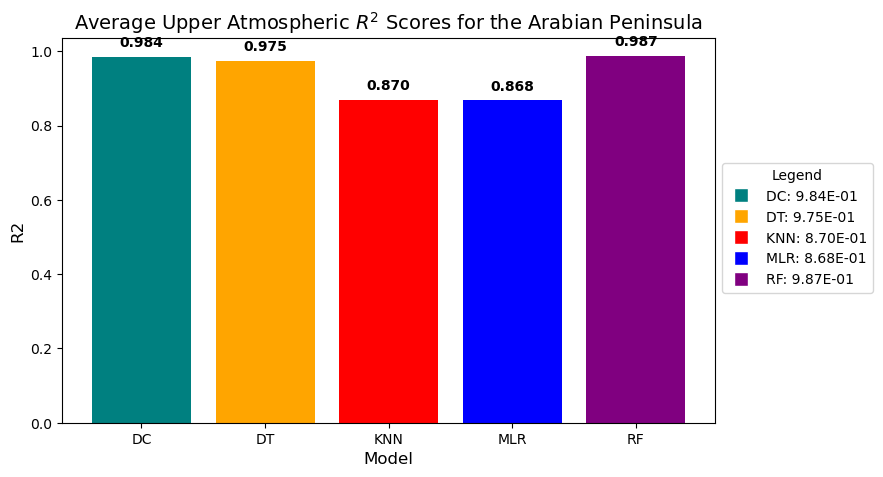

C:\Users\Charl\AppData\Local\Temp\ipykernel_28364\3502015035.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([model_mapping.get(item, item.upper()) for item in average_metrics['Model']])


Saved regional average plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_metric_plots_RMSE\average_MSE_AP.png


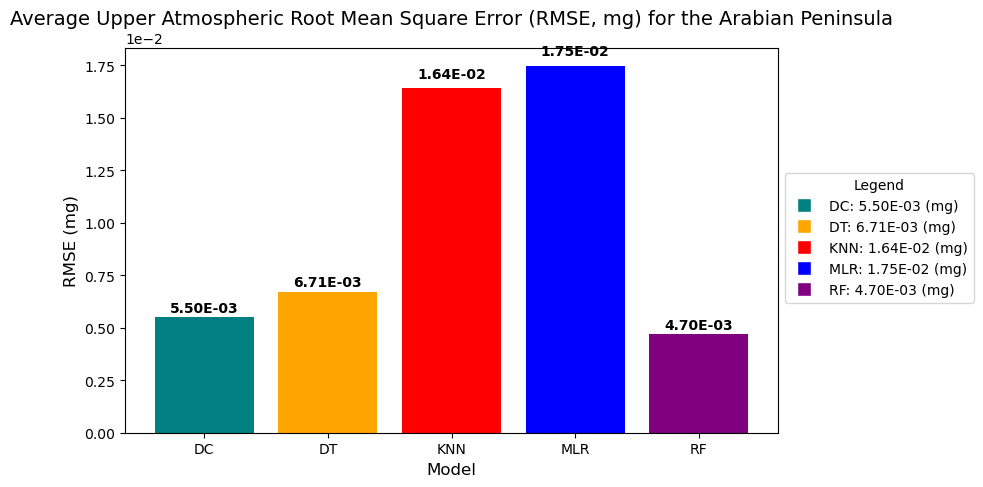

C:\Users\Charl\AppData\Local\Temp\ipykernel_28364\3502015035.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([model_mapping.get(item, item.upper()) for item in average_metrics['Model']])


Saved regional average plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_metric_plots_RMSE\average_MAE_AP.png


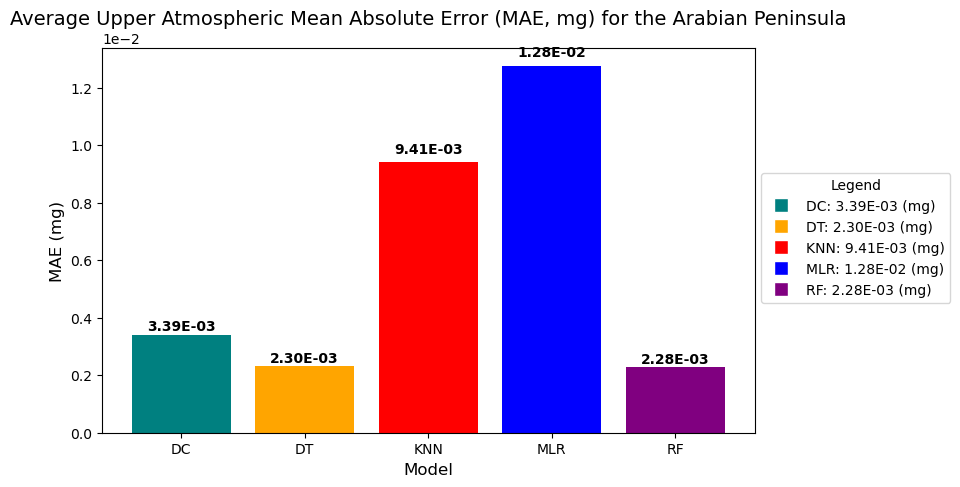

C:\Users\Charl\AppData\Local\Temp\ipykernel_28364\3502015035.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([model_mapping.get(item, item.upper()) for item in average_metrics['Model']])


Saved regional average plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_metric_plots_RMSE\average_Weight_AP.png


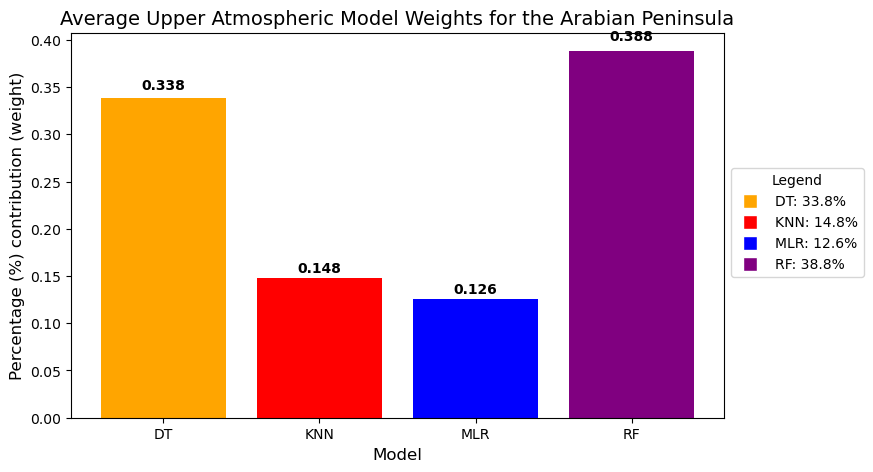

In [4]:
#UA-UPPERCASE labels
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\ua_model_metrics_2023_v0063.csv"
data = pd.read_csv(file_path)

# Rename ensemble model to 'DustCast' (DC)
data['Model'] = data['Model'].replace({'ensemble': 'DC'})

# Define color and marker scheme
model_styles = {
    'DC': ('teal', 's'),  # DustCast
    'lr': ('blue', 's'),  # Linear Regression
    # 'svr': ('green', 's'),  # Support Vector Regression
    'knn': ('red', 's'),  # K-Nearest Neighbors
    'dt': ('orange', 's'),  # Decision Tree
    'rf': ('purple', 's')  # Random Forest
}

# Define mapping from original model keys to desired uppercase labels
model_mapping = {
    'DC': 'DC',
    'lr': 'MLR',
    'knn': 'KNN',
    'dt': 'DT',
    'rf': 'RF'
}

# Metrics to plot
metrics = ['Weight', 'R2', 'MSE', 'MAE']
titles = {
    'Weight': "Model Weights",
    'R2': "$R^2$ Scores",
    'MSE': "Mean Square Error (MSE)",
    'MAE': "Mean Absolute Error (MAE)"
}

# Define output directory for plots
output_dir = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_metric_plots_RMSE"
os.makedirs(output_dir, exist_ok=True)  # Ensure directory exists

def add_value_labels(ax, bars, is_sci_notation=False):
    """Adds value labels on top of each bar."""
    for bar in bars:
        height = bar.get_height()
        if is_sci_notation:
            label = f"{height:.2E}"  # Scientific notation
        else:
            label = f"{height:.3f}"
        ax.text(bar.get_x() + bar.get_width() / 2, height * 1.02, label,
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Compute and plot the average MSE, MAE, R², and Weight across all countries
for metric in ['R2', 'MSE', 'MAE', 'Weight']:
    average_metrics = data.groupby('Model')[metric].mean().reset_index()
    
    # Convert the values:
    # For MSE, take the square root (i.e., RMSE) then convert to milligrams (mg)
    if metric == 'MSE':
        average_metrics[metric] = average_metrics[metric].apply(lambda x: x**0.5) * 1e3
    # For MAE, simply convert to milligrams (mg)
    elif metric == 'MAE':
        average_metrics[metric] = average_metrics[metric] * 1e3

    # For the Weight metric, exclude DC and update the y-axis label and legend formatting
    if metric == "Weight":
        average_metrics = average_metrics[average_metrics['Model'] != 'DC']
    
    # Create a new figure for the regional average with space for the right legend
    fig, ax = plt.subplots(figsize=(9, 5))
    colors = [model_styles.get(model, ('gray', 'o'))[0] for model in average_metrics['Model']]
    
    bars = ax.bar(average_metrics['Model'], average_metrics[metric], color=colors)
    ax.set_xlabel("Model", fontsize=12)
    
    # Update x-axis tick labels using the mapping for uppercase display names
    ax.set_xticklabels([model_mapping.get(item, item.upper()) for item in average_metrics['Model']])
    
    # Update title and y-axis label according to the metric and desired units
    if metric == 'MSE':
        ax.set_title("Average Upper Atmospheric Root Mean Square Error (RMSE, mg) for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel("RMSE (mg)", fontsize=12)
    elif metric == 'MAE':
        ax.set_title("Average Upper Atmospheric Mean Absolute Error (MAE, mg) for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel("MAE (mg)", fontsize=12)
    elif metric == "Weight":
        ax.set_title(f"Average Upper Atmospheric {titles[metric]} for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel("Percentage (%) contribution (weight)", fontsize=12)
    else:
        ax.set_title(f"Average Upper Atmospheric {titles[metric]} for the Arabian Peninsula", fontsize=14)
        ax.set_ylabel(metric, fontsize=12)

    # Apply scientific notation to y-axis for small values for MSE and MAE
    if metric in ['MSE', 'MAE']:
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        add_value_labels(ax, bars, is_sci_notation=True)
    else:
        add_value_labels(ax, bars, is_sci_notation=False)

    # Create legends:
    filtered_models = average_metrics['Model'].unique()

    # Legend 1: Model Colors (inside graph, upper right)
    handles_colors = [plt.Line2D([0], [0], marker=model_styles[m][1], color='w', 
                                 markerfacecolor=model_styles[m][0], markersize=10) 
                      for m in filtered_models if m in model_styles]

    # Legend 2: Metric Values (right next to the graph) with units for MSE and MAE
    if metric == "Weight":
        labels_values = [f"{model_mapping.get(m, m.upper())}: {average_metrics[average_metrics['Model'] == m][metric].values[0]*100:.1f}%" 
                         for m in filtered_models if m in model_styles]
    elif metric in ["MSE", "MAE"]:
        labels_values = [f"{model_mapping.get(m, m.upper())}: {average_metrics[average_metrics['Model'] == m][metric].values[0]:.2E} (mg)"
                         for m in filtered_models if m in model_styles]
    else:
        labels_values = [f"{model_mapping.get(m, m.upper())}: {average_metrics[average_metrics['Model'] == m][metric].values[0]:.2E}"
                         for m in filtered_models if m in model_styles]
    
    fig.subplots_adjust(right=0.85)  # Fine-tune spacing for the second legend
    plt.figlegend(handles_colors, labels_values, loc='center left', title="Legend", bbox_to_anchor=(0.85, 0.5))

    # Save the figure
    save_path = os.path.join(output_dir, f"average_{metric}_AP.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Saved regional average plot: {save_path}")

    # Show the plot
    plt.show()
